# Artificial Intelligence
###  School of Mechanical Engineering-Tehran University-2022

Dear students

1. This notebook provides all the necessary explanations and codes for ***InceptionV3***, a Convolutional Neural Network (CNN).

2. Various resources such as GitHub, Kaggle, and books have been used in this notebook. This notebook has three parts (part I, part II, and part III).

3. You can open this notebook in your anaconda distribution and see all the inserted images. If you are using Google colab, upload the images to your Google drive and put the path in the notebook. I ran the model in Google Colab.

4. CNN has many applications in Engineering, including Advanced Manufacturing Technology. Please see [New domain adaptation method in shallow and deep layers of the CNN for bearing fault diagnosis under different working conditions]- https://link.springer.com/article/10.1007/s00170-021-07385-9.

If further elucidation is warranted, please drop me a line.

Cheers,

Affiliated Research Professor Mohammad Khoshnevisan

# Part I - InceptionV3 

## 1. Import packages

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# imports 
import tensorflow as tf
from tensorflow import keras

import numpy as np
import math

from IPython.display import HTML
from IPython.display import Image
from IPython.display import Latex

from base64 import b64encode

In [3]:
# play media function
def play(filename):
    html = ''
    video = open(filename ,'rb').read()
    src = 'data:video/mp4;base64,' + b64encode(video).decode()
    html += '<video width=500 controls autoplay loop><source src="%s" type="video/mp4"></video>' % src 
    return HTML(html)

# play the convolution media
video_path =  '/content/drive/MyDrive/Projects/AI-course/session 5/InceptionV3-Convolutional Neural Network/Convolution.mp4'
play(video_path)

Output hidden; open in https://colab.research.google.com to view.

## 2. Inception naive version

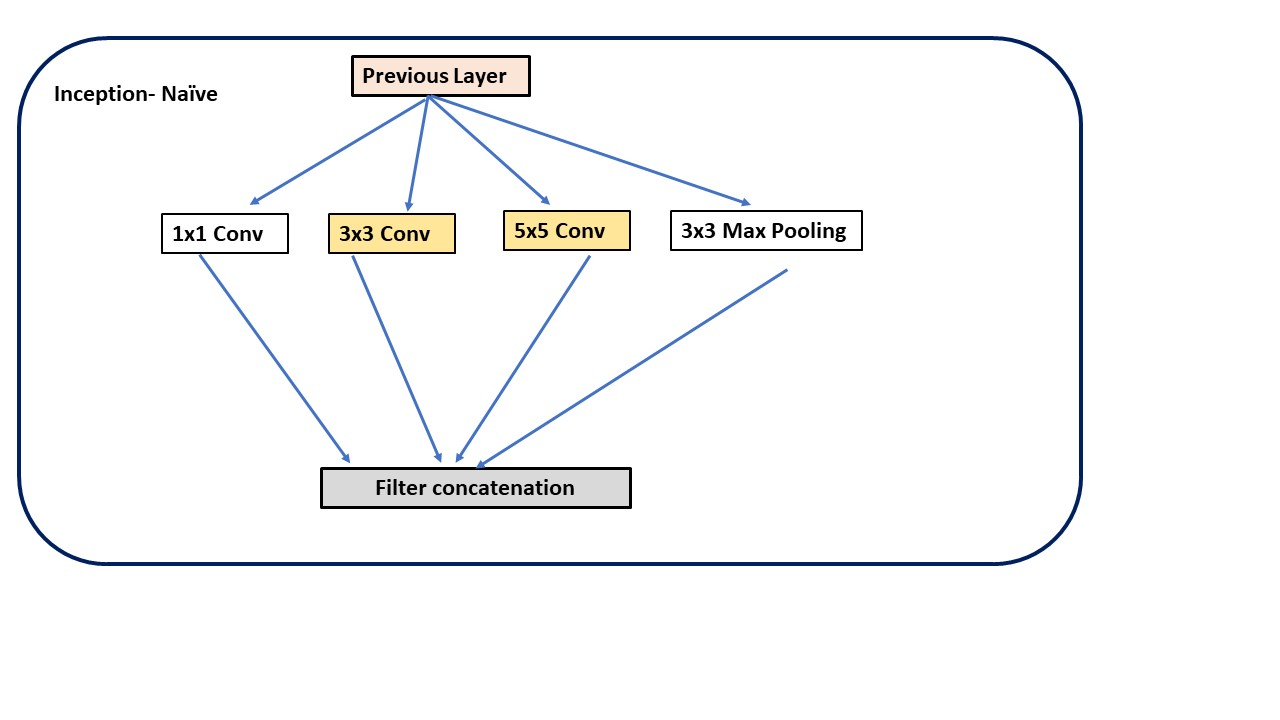

In [4]:
Image("/content/drive/MyDrive/Projects/AI-course/session 5/InceptionV3-Convolutional Neural Network/InceptionV3-0.jpg")

In [5]:
# showing inception module - defining function of inception modules 
def inception_module(x, f1, f2, f3):
    
    conv1 =  keras.layers.Conv2D(f1, (1,1), padding='same', activation='relu')(x)

    conv3 = keras.layers.Conv2D(f2, (3,3), padding='same', activation='relu')(x)

    conv5 = keras.layers.Conv2D(f3, (5,5), padding='same', activation='relu')(x)

    pool = keras.layers.MaxPooling2D((3,3), strides=(1,1), padding='same')(x)
    
    out = keras.layers.merge.concatenate([conv1, conv3, conv5, pool])
    return out

## 3. InceptionV3

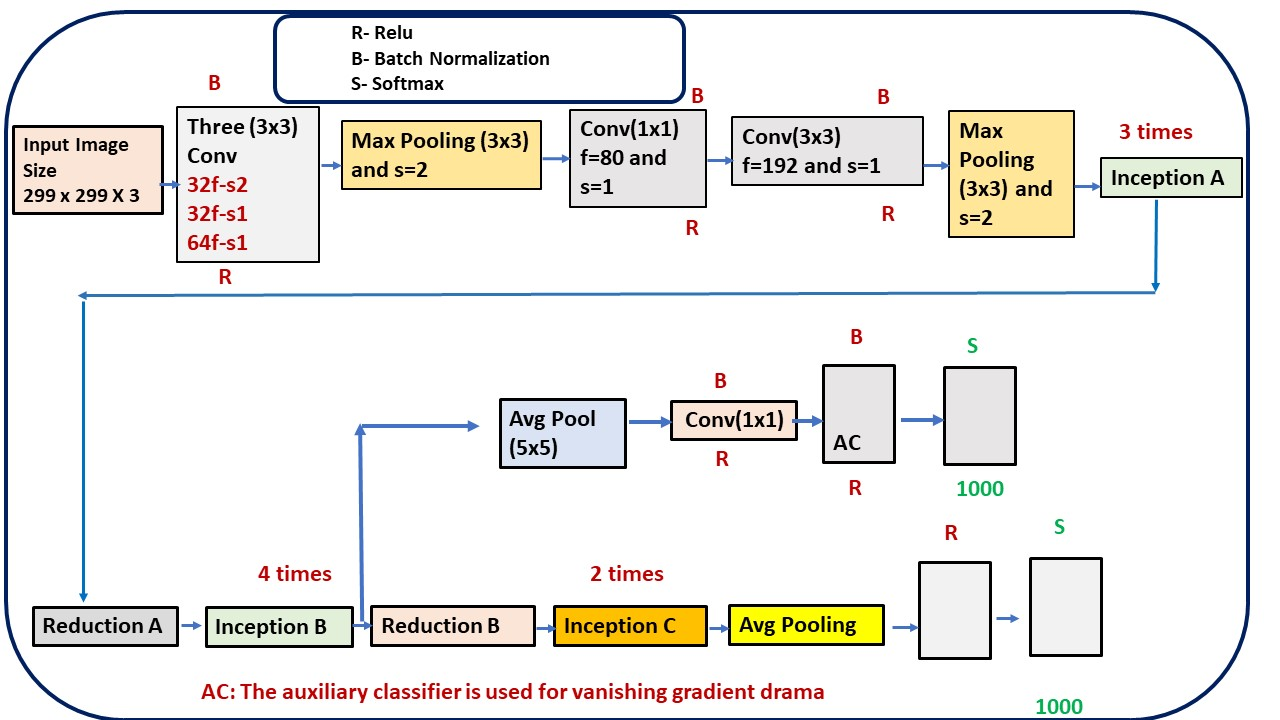

In [6]:
# showing image
# html1 = '<img src="InceptionV3-7a.jpg" width="1000" height="1000" align="center"/>'
# HTML(html1)
Image("/content/drive/MyDrive/Projects/AI-course/session 5/InceptionV3-Convolutional Neural Network/InceptionV3-7a.jpg")

In [7]:
# determining the input shape
img_input = keras.Input(shape=(299, 299, 3))

# number of classes
classes=3

# path of the weight file
WEIGHTS_PATH = 'inception_v3_weights_tf_dim_ordering_tf_kernels.h5'

# RGB 
channel_axis=3

## 4. Note that num_row and num_cols are the height and width of the filters

In [8]:
def conv2d_bn(x, filters, num_row, num_col, padding='same', strides=(1, 1)):
    # adding conv-2d layer 
    x = keras.layers.Conv2D(filters, (num_row, num_col),strides=strides,padding=padding)(x)
    
    # adding batch normalization 
    x = keras.layers.BatchNormalization(axis=3, scale=False)(x)
    
    # adding activation function 
    x = keras.layers.Activation('relu')(x)
    return x

# 5.  Inception A

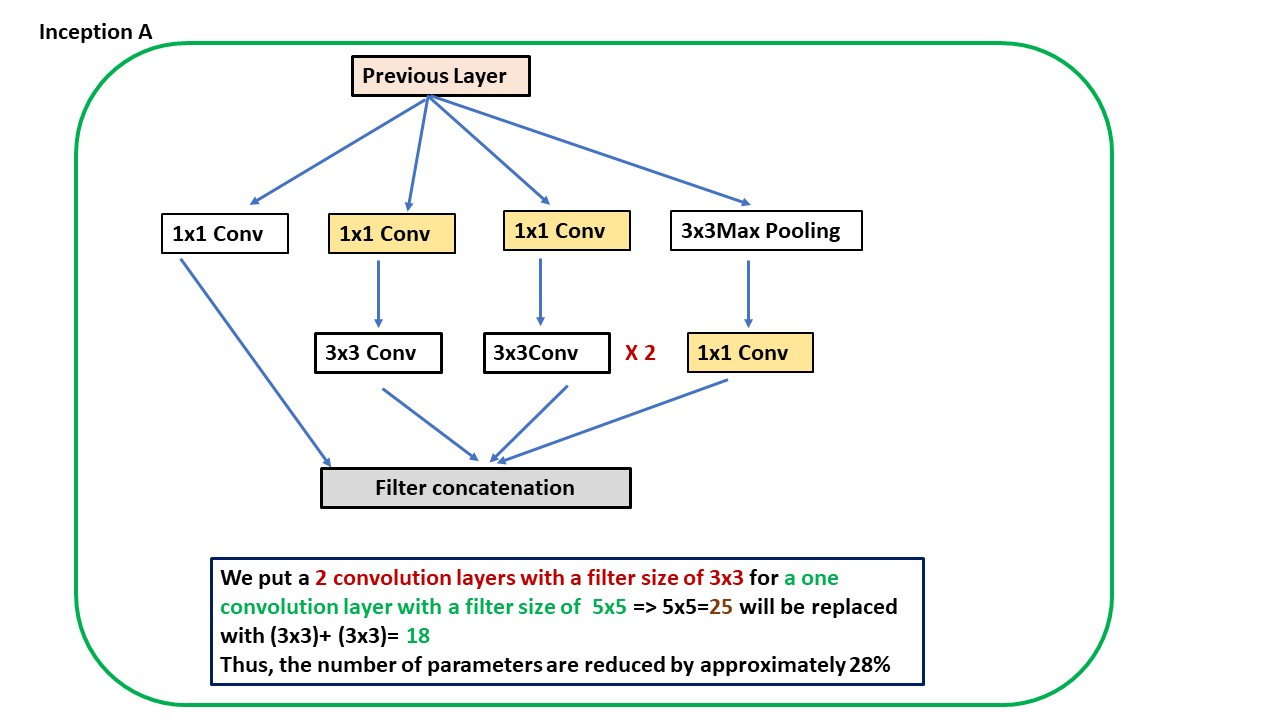

In [ ]:
# html1 = '<img src="InceptionV3-2a.jpg" width="1000" height="1000" align="center"/>'
# HTML(html1)
Image("/content/drive/MyDrive/Projects/AI-course/session 5/InceptionV3-Convolutional Neural Network/InceptionV3-2a.jpg")

## 6. We put a 2 convolution layers with a filter size of 3x3 for a one convolution layer with a filter size of  5x5. (5x5=25) will be replaced with (3x3)+ (3x3)= 18 according to figure in block 5

In [ ]:
# defining the Inception A function
def inc_block_a(x):    
    branch1x1 = conv2d_bn(x, 64, 1, 1)  

    branch5x5 = conv2d_bn(x, 48, 1, 1)  
    branch5x5 = conv2d_bn(branch5x5, 64, 5, 5)

    branch3x3dbl = conv2d_bn(x, 64, 1, 1)
    branch3x3dbl = conv2d_bn(branch3x3dbl, 96, 3, 3)
    branch3x3dbl = conv2d_bn(branch3x3dbl, 96, 3, 3)

    branch_pool = keras.layers.AveragePooling2D((3, 3), strides=(1, 1), padding='same')(x)
    branch_pool = conv2d_bn(branch_pool, 32, 1, 1)
    x = keras.layers.concatenate([branch1x1, branch5x5, branch3x3dbl, branch_pool], axis=channel_axis)
    return x

## 7. Reduction A


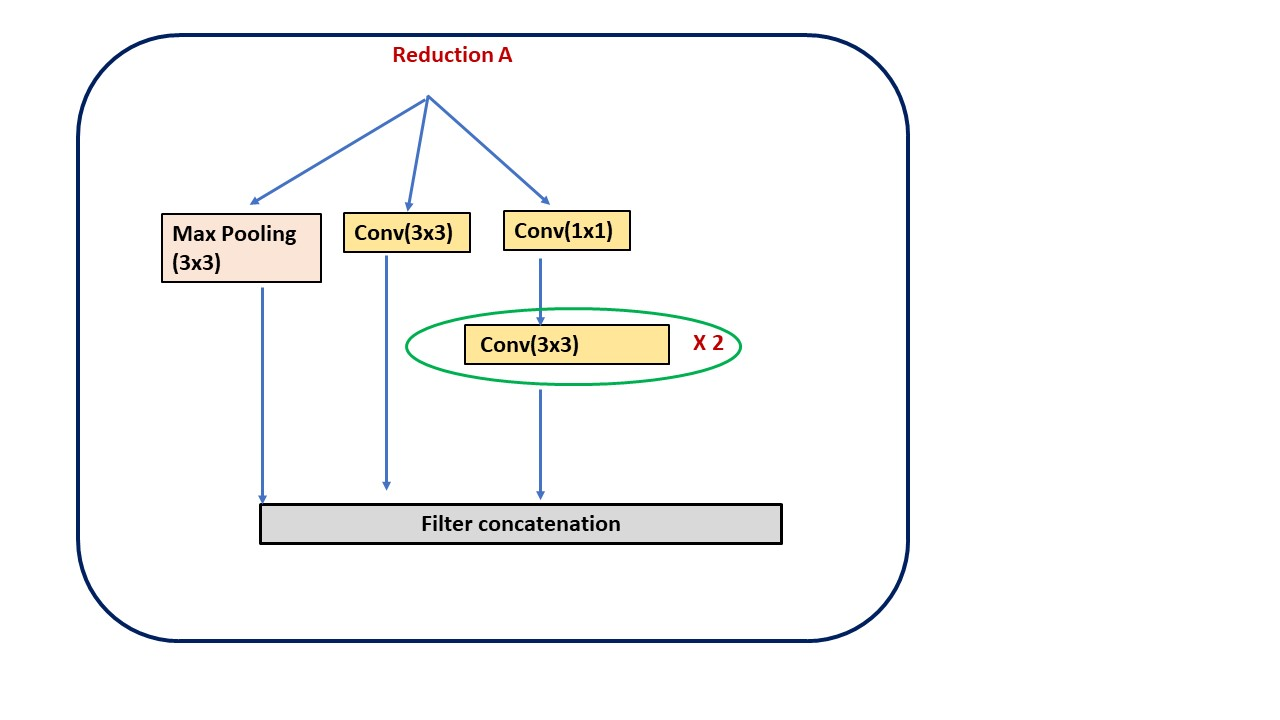

In [ ]:
# html1 = '<img src="InceptionV3-8.jpg" width="1000" height="1000" align="center"/>'
# HTML(html1)
Image("/content/drive/MyDrive/Projects/AI-course/session 5/InceptionV3-Convolutional Neural Network/InceptionV3-8.jpg")

In [ ]:
# defining reduction
def reduction_block_a(x):  
    branch3x3 = conv2d_bn(x, 384, 3, 3, strides=(2, 2), padding='valid')

    branch3x3dbl = conv2d_bn(x, 64, 1, 1)
    branch3x3dbl = conv2d_bn(branch3x3dbl, 96, 3, 3)
    branch3x3dbl = conv2d_bn(branch3x3dbl, 96, 3, 3, strides=(2, 2), padding='valid')

    branch_pool = keras.layers.MaxPooling2D((3, 3), strides=(2, 2))(x)
    x = keras.layers.concatenate([branch3x3, branch3x3dbl, branch_pool],axis=channel_axis)
    return x

## 8. Inception B

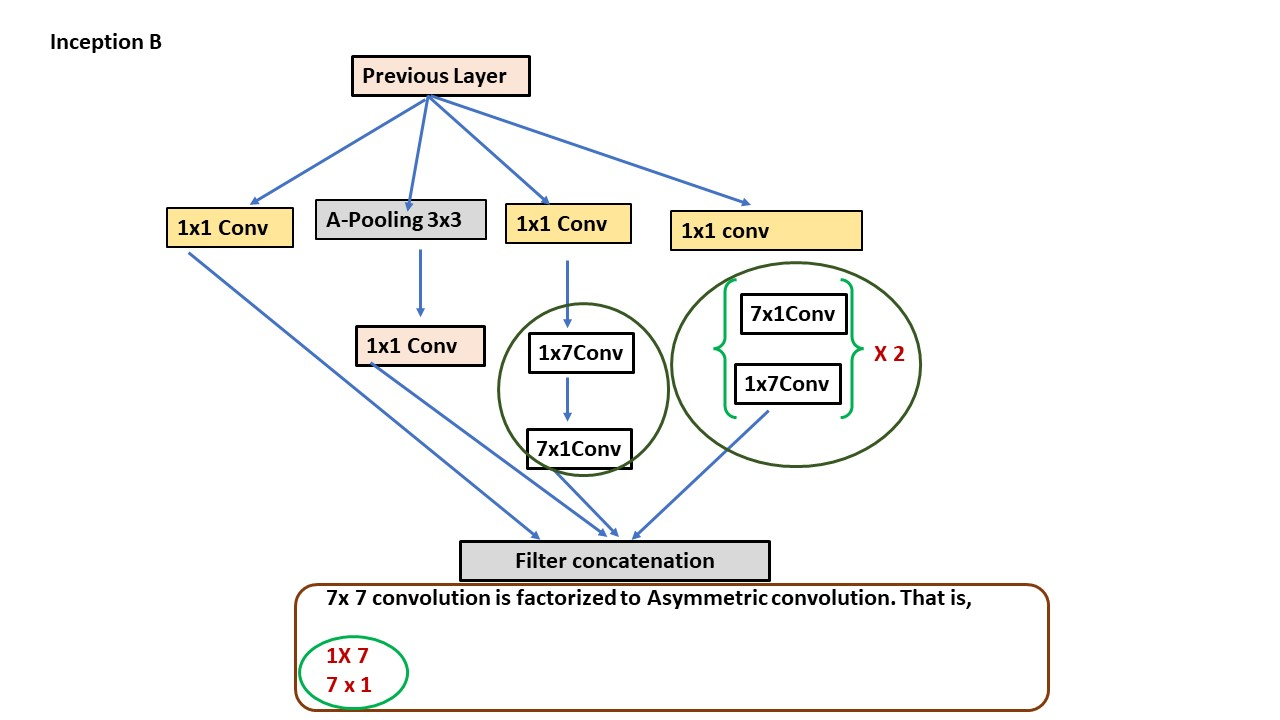

In [ ]:
# html1 = '<img src="InceptionV3-5.jpg" width="1000" height="1000" align="center"/>'
# HTML(html1)
Image("/content/drive/MyDrive/Projects/AI-course/session 5/InceptionV3-Convolutional Neural Network/InceptionV3-5.jpg")

In [ ]:
def inc_block_b(x):
    branch1x1 = conv2d_bn(x, 192, 1, 1)

    branch7x7 = conv2d_bn(x, 128, 1, 1)
    branch7x7 = conv2d_bn(branch7x7, 128, 1, 7)
    branch7x7 = conv2d_bn(branch7x7, 192, 7, 1)

    branch7x7dbl = conv2d_bn(x, 128, 1, 1)
    branch7x7dbl = conv2d_bn(branch7x7dbl, 128, 7, 1)
    branch7x7dbl = conv2d_bn(branch7x7dbl, 128, 1, 7)
    branch7x7dbl = conv2d_bn(branch7x7dbl, 128, 7, 1)
    branch7x7dbl = conv2d_bn(branch7x7dbl, 192, 1, 7)

    branch_pool = keras.layers.AveragePooling2D((3, 3), strides=(1, 1),padding='same')(x)
    branch_pool = conv2d_bn(branch_pool, 192, 1, 1)
    x = keras.layers.concatenate([branch1x1, branch7x7, branch7x7dbl, branch_pool], axis=channel_axis)
    return x

# 9. Reduction B

In [ ]:
html1 = '<img src="InceptionV3-9.jpg" width="1000" height="1000" align="center"/>'
HTML(html1)

In [ ]:
def reduction_block_b(x): 
    branch3x3 = conv2d_bn(x, 192, 1, 1)
    branch3x3 = conv2d_bn(branch3x3, 320, 3, 3,strides=(2, 2), padding='valid')

    branch7x7x3 = conv2d_bn(x, 192, 1, 1)
    branch7x7x3 = conv2d_bn(branch7x7x3, 192, 1, 7)
    branch7x7x3 = conv2d_bn(branch7x7x3, 192, 7, 1)
    branch7x7x3 = conv2d_bn( branch7x7x3, 192, 3, 3, strides=(2, 2), padding='valid')

    branch_pool = keras.layers.MaxPooling2D((3, 3), strides=(2, 2))(x)
    x = keras.layers.concatenate([branch3x3, branch7x7x3, branch_pool], axis=channel_axis)
    return x

# 10.  Inception C

In [ ]:
html1 = '<img src="InceptionV3-4.jpg" width="1000" height="1000" align="center"/>'
HTML(html1)

In [ ]:
def inc_block_c(x):        
        branch1x1 = conv2d_bn(x, 320, 1, 1)

        branch3x3 = conv2d_bn(x, 384, 1, 1)
        branch3x3_1 = conv2d_bn(branch3x3, 384, 1, 3)
        branch3x3_2 = conv2d_bn(branch3x3, 384, 3, 1)
        branch3x3 = keras.layers.concatenate([branch3x3_1, branch3x3_2],axis=channel_axis)

        branch3x3dbl = conv2d_bn(x, 448, 1, 1)
        branch3x3dbl = conv2d_bn(branch3x3dbl, 384, 3, 3)
        branch3x3dbl_1 = conv2d_bn(branch3x3dbl, 384, 1, 3)
        branch3x3dbl_2 = conv2d_bn(branch3x3dbl, 384, 3, 1)
        branch3x3dbl = keras.layers.concatenate([branch3x3dbl_1, branch3x3dbl_2], axis=channel_axis)

        branch_pool = keras.layers.AveragePooling2D((3, 3), strides=(1, 1), padding='same')(x)
        branch_pool = conv2d_bn(branch_pool, 192, 1, 1)
        x = keras.layers.concatenate( [branch1x1, branch3x3, branch3x3dbl, branch_pool],axis=channel_axis)
        return x

In [ ]:
img_input = keras.Input(shape=(299, 299, 3))  

# 11. Final Stage

In [ ]:
html1 = '<img src="InceptionV3-7.jpg" width="1000" height="1000" align="center"/>'
HTML(html1)

In [ ]:

x = conv2d_bn(img_input, 32, 3, 3, strides=(2, 2), padding='valid') 
x = conv2d_bn(x, 32, 3, 3, padding='valid')  
x = conv2d_bn(x, 64, 3, 3) 

x = keras.layers.MaxPooling2D((3, 3), strides=(2, 2))(x)   
x = conv2d_bn(x, 80, 1, 1, padding='valid') 
x = conv2d_bn(x, 192, 3, 3, padding='valid')  
x = keras.layers.MaxPooling2D((3, 3), strides=(2, 2))(x)  

# ==================================================
x=inc_block_a(x) 
x=inc_block_a(x) 
x=inc_block_a(x) 

# ==================================================

x=reduction_block_a(x) 

# ==================================================

x=inc_block_b(x) 
x=inc_block_b(x) 
x=inc_block_b(x) 
x=inc_block_b(x) 

# ==================================================
x=reduction_block_b(x) 

# ==================================================

x=inc_block_c(x) 
x=inc_block_c(x) 

# ==================================================

x = keras.layers.GlobalAveragePooling2D(name='avg_pool')(x) 

x = keras.layers.Dense(classes, activation='softmax', name='predictions')(x) 

# ====================================================



inputs = img_input
model =  keras.Model(inputs, x, name='inception_v3')
model.summary()


# ===================================================


Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 149, 149, 32  896         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 149, 149, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                      

In [ ]:
from tensorflow.keras.utils import  plot_model
plot_model(model, show_shapes=True, to_file='Inception_model_3.png')

# Part II

# 1.  We are using a small dataset from Kaggle and employ InceptionV3 to predict the following types of skin cancer

## A.Melanoma 
## B.Melanocytic nevus 
## C. Basal cell carcinoma 


In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import os

# the path to the skin cancer different types data
dataset_path = os.listdir('Skin_Cancer')
                          
# the different types of skin cancer
cancer_types = os.listdir('Skin_Cancer')

# the number of different types of skin cancer
print("Types of cancer found: ", len(dataset_path))

Types of cancer found:  3


# 2. The first for loop will get all the files, and the second for loop will add all of them to the list

In [ ]:
cancers = []

for item in cancer_types:
    
    all_cancers = os.listdir('Skin_Cancer/' + item)
    for cancer in all_cancers:
        cancers.append((item, 'Skin_Cancer/' + item + '/' + cancer))
  
cancers

[('Carcinoma', 'Skin_Cancer/Carcinoma/ISIC_0025285.jpg'),
 ('Carcinoma', 'Skin_Cancer/Carcinoma/ISIC_0025299.jpg'),
 ('Carcinoma', 'Skin_Cancer/Carcinoma/ISIC_0025301.jpg'),
 ('Carcinoma', 'Skin_Cancer/Carcinoma/ISIC_0025322.jpg'),
 ('Carcinoma', 'Skin_Cancer/Carcinoma/ISIC_0025362.jpg'),
 ('Carcinoma', 'Skin_Cancer/Carcinoma/ISIC_0025383.jpg'),
 ('Carcinoma', 'Skin_Cancer/Carcinoma/ISIC_0028495.jpg'),
 ('Carcinoma', 'Skin_Cancer/Carcinoma/ISIC_0028542.jpg'),
 ('Carcinoma', 'Skin_Cancer/Carcinoma/ISIC_0028556.jpg'),
 ('Carcinoma', 'Skin_Cancer/Carcinoma/ISIC_0028568.jpg'),
 ('Carcinoma', 'Skin_Cancer/Carcinoma/ISIC_0028570.jpg'),
 ('Carcinoma', 'Skin_Cancer/Carcinoma/ISIC_0028577.jpg'),
 ('Carcinoma', 'Skin_Cancer/Carcinoma/ISIC_0028583.jpg'),
 ('Carcinoma', 'Skin_Cancer/Carcinoma/ISIC_0028652.jpg'),
 ('Carcinoma', 'Skin_Cancer/Carcinoma/ISIC_0028653.jpg'),
 ('Carcinoma', 'Skin_Cancer/Carcinoma/ISIC_0028670.jpg'),
 ('Carcinoma', 'Skin_Cancer/Carcinoma/ISIC_0028671.jpg'),
 ('Carcinoma',

# 3. We build a DataFrame

In [ ]:
cancers_df = pd.DataFrame(data=cancers, columns=['cancer type', 'image'])
print(cancers_df.head())
print(cancers_df.tail())

  cancer type                                   image
0   Carcinoma  Skin_Cancer/Carcinoma/ISIC_0025285.jpg
1   Carcinoma  Skin_Cancer/Carcinoma/ISIC_0025299.jpg
2   Carcinoma  Skin_Cancer/Carcinoma/ISIC_0025301.jpg
3   Carcinoma  Skin_Cancer/Carcinoma/ISIC_0025322.jpg
4   Carcinoma  Skin_Cancer/Carcinoma/ISIC_0025362.jpg
    cancer type                               image
173       Nevus  Skin_Cancer/Nevus/ISIC_0000426.jpg
174       Nevus  Skin_Cancer/Nevus/ISIC_0000427.jpg
175       Nevus  Skin_Cancer/Nevus/ISIC_0000430.jpg
176       Nevus  Skin_Cancer/Nevus/ISIC_0000431.jpg
177       Nevus  Skin_Cancer/Nevus/ISIC_0000433.jpg


# 4. We check to see how many observations/samples we have for each class. 

In [ ]:
print("Total number of Skin Cancer in the dataset: ", len(cancers_df))

cancer_count = cancers_df['cancer type'].value_counts()

print("cancer in each category: ")
print(cancer_count)


Total number of Skin Cancer in the dataset:  178
cancer in each category: 
Melanoma     64
Nevus        64
Carcinoma    50
Name: cancer type, dtype: int64


# 5. In the first for loop, we go in all the three folders [Melanoma, Carcinoma,and Nevus], and then we get the names of the images. In the second part of the code, we read the image as an array.



In [ ]:
import cv2
path = 'Skin_Cancer/'


im_size = 299

images = []
labels = []

for i in cancer_types:
    data_path = path + str(i)  
    filenames = [i for i in os.listdir(data_path) ]
    print(filenames)  
    for f in filenames:
        img = cv2.imread(data_path + '/' + f)  
        img = cv2.resize(img, (im_size, im_size))
        images.append(img)
        labels.append(i)
labels

['ISIC_0025285.jpg', 'ISIC_0025299.jpg', 'ISIC_0025301.jpg', 'ISIC_0025322.jpg', 'ISIC_0025362.jpg', 'ISIC_0025383.jpg', 'ISIC_0028495.jpg', 'ISIC_0028542.jpg', 'ISIC_0028556.jpg', 'ISIC_0028568.jpg', 'ISIC_0028570.jpg', 'ISIC_0028577.jpg', 'ISIC_0028583.jpg', 'ISIC_0028652.jpg', 'ISIC_0028653.jpg', 'ISIC_0028670.jpg', 'ISIC_0028671.jpg', 'ISIC_0028677.jpg', 'ISIC_0028687.jpg', 'ISIC_0028688.jpg', 'ISIC_0028693.jpg', 'ISIC_0028719.jpg', 'ISIC_0028728.jpg', 'ISIC_0028739.jpg', 'ISIC_0028747.jpg', 'ISIC_0028765.jpg', 'ISIC_0028807.jpg', 'ISIC_0028814.jpg', 'ISIC_0028815.jpg', 'ISIC_0028818.jpg', 'ISIC_0028858.jpg', 'ISIC_0028871.jpg', 'ISIC_0028877.jpg', 'ISIC_0028890.jpg', 'ISIC_0028928.jpg', 'ISIC_0028937.jpg', 'ISIC_0028964.jpg', 'ISIC_0028973.jpg', 'ISIC_0028978.jpg', 'ISIC_0028980.jpg', 'ISIC_0028989.jpg', 'ISIC_0028994.jpg', 'ISIC_0029020.jpg', 'ISIC_0029034.jpg', 'ISIC_0029035.jpg', 'ISIC_0029053.jpg', 'ISIC_0029082.jpg', 'ISIC_0029083.jpg', 'ISIC_0029123.jpg', 'ISIC_0029129.jpg']

['Carcinoma',
 'Carcinoma',
 'Carcinoma',
 'Carcinoma',
 'Carcinoma',
 'Carcinoma',
 'Carcinoma',
 'Carcinoma',
 'Carcinoma',
 'Carcinoma',
 'Carcinoma',
 'Carcinoma',
 'Carcinoma',
 'Carcinoma',
 'Carcinoma',
 'Carcinoma',
 'Carcinoma',
 'Carcinoma',
 'Carcinoma',
 'Carcinoma',
 'Carcinoma',
 'Carcinoma',
 'Carcinoma',
 'Carcinoma',
 'Carcinoma',
 'Carcinoma',
 'Carcinoma',
 'Carcinoma',
 'Carcinoma',
 'Carcinoma',
 'Carcinoma',
 'Carcinoma',
 'Carcinoma',
 'Carcinoma',
 'Carcinoma',
 'Carcinoma',
 'Carcinoma',
 'Carcinoma',
 'Carcinoma',
 'Carcinoma',
 'Carcinoma',
 'Carcinoma',
 'Carcinoma',
 'Carcinoma',
 'Carcinoma',
 'Carcinoma',
 'Carcinoma',
 'Carcinoma',
 'Carcinoma',
 'Carcinoma',
 'Melanoma',
 'Melanoma',
 'Melanoma',
 'Melanoma',
 'Melanoma',
 'Melanoma',
 'Melanoma',
 'Melanoma',
 'Melanoma',
 'Melanoma',
 'Melanoma',
 'Melanoma',
 'Melanoma',
 'Melanoma',
 'Melanoma',
 'Melanoma',
 'Melanoma',
 'Melanoma',
 'Melanoma',
 'Melanoma',
 'Melanoma',
 'Melanoma',
 'Melanoma',
 

# 6. Image shape using numpy

In [ ]:
images = np.array(images)
images.shape   

(178, 299, 299, 3)

# 7. Preprocessing, LabelEncoder and OneHotEncoder
## Note :  We convert the scalar output into vector output. Thus, we will have our correct class as one(1), and all other classes as zero(0).

In [ ]:
images = images.astype('float32') / 255.0

In [ ]:
from sklearn.preprocessing import LabelEncoder , OneHotEncoder
y=cancers_df['cancer type'].values


y_labelencoder = LabelEncoder ()
y = y_labelencoder.fit_transform (y)
print (y)

y=y.reshape(-1,1)


onehotencoder=OneHotEncoder(categories='auto', sparse=False)


Y= onehotencoder.fit_transform(y)
Y.shape 

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


(178, 3)

# 8. We shuffle our data and do train_test_split. We also check the shape of our training data and testing data.

In [ ]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split


images, Y = shuffle(images, Y, random_state=1)

train_x, test_x, train_y, test_y = train_test_split(images, Y, test_size=0.20, random_state=415)

#inpect the shape of the training and testing.
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(138, 299, 299, 3)
(138, 3)
(35, 299, 299, 3)
(35, 3)


# 9. We build our model

In [ ]:
inputs = img_input
model =  keras.Model(inputs, x, name='inception_v3')

# 10. We compile our model

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 11. Our model summary

In [ ]:
model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 149, 149, 32  896         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 149, 149, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                      

In [ ]:
model.fit(train_x, train_y, epochs = 7, batch_size = 20) 

Epoch 1/7
7/7 [==============================] - 9s 885ms/step - loss: 0.4181 - accuracy: 0.8841
Epoch 2/7
7/7 [==============================] - 2s 268ms/step - loss: 0.3445 - accuracy: 0.8406
Epoch 3/7
7/7 [==============================] - 2s 270ms/step - loss: 0.2217 - accuracy: 0.9130
Epoch 4/7
7/7 [==============================] - 2s 271ms/step - loss: 0.2543 - accuracy: 0.9130
Epoch 5/7
7/7 [==============================] - 2s 270ms/step - loss: 0.2197 - accuracy: 0.9058
Epoch 6/7
7/7 [==============================] - 2s 272ms/step - loss: 0.1370 - accuracy: 0.9565
Epoch 7/7
7/7 [==============================] - 2s 270ms/step - loss: 0.1106 - accuracy: 0.9638


# 12. We evaluate our model on our test data

In [ ]:
preds = model.evaluate(test_x, test_y)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

2/2 [==============================] - 0s 41ms/step - loss: 1.1040 - accuracy: 0.7143
Loss = 1.1040221452713013
Test Accuracy = 0.7142857313156128


# 13. We predict one image 

Input image shape: (1, 299, 299, 3)
[[0.0000000e+00 1.0000000e+00 1.6117896e-29]]


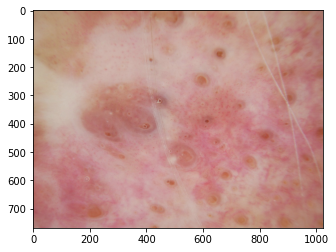

In [ ]:
from matplotlib.pyplot import imread
from keras.preprocessing import image
from keras.applications.imagenet_utils import preprocess_input
from matplotlib.pyplot import imshow
img_path = '/content/drive/MyDrive/Skin-Image/ISIC_0011178.jpg'
img = image.load_img(img_path, target_size=(299, 299))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
print('Input image shape:', x.shape)
my_image = imread(img_path)
imshow(my_image)
print(model.predict(x))

# **Part III**

# **Hyperparameters tuning-Optimize your CNN by Keras Tuner**

 # **Install Keras Tuner**

In [ ]:
!pip install keras-tuner

# **1.Import packages**

In [ ]:
import tensorflow as tf
from tensorflow import keras
import keras_tuner
import numpy as np
from kerastuner import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters



# **2.Import Fashion_Mnist Dataset**

In [ ]:
fashion_mnist=keras.datasets.fashion_mnist

# **3.Our train data and test data**

In [ ]:
(train_images,train_labels),(test_images,test_labels)=fashion_mnist.load_data()

# **4.Divide by 255 as discussed in the class**

In [ ]:
train_images=train_images/255.0
test_images=test_images/255.0


# **5.We reshape our images**

In [ ]:
train_images=train_images.reshape(len(train_images),28,28,1)
test_images=test_images.reshape(len(test_images),28,28,1)


# **6.We build our model, and hp inside the parentheses ( ) is our hyperparameters**

In [ ]:
def build_model(hp):  
  model = keras.Sequential([
    keras.layers.Conv2D(
        filters=hp.Int('conv_1_filter', min_value=32, max_value=90, step=14),
        kernel_size=hp.Choice('conv_1_kernel', values = [3,5]),
        activation='relu',
        input_shape=(28,28,1)
    ),
    keras.layers.Conv2D(
        filters=hp.Int('conv_2_filter', min_value=32, max_value=50, step=15),
        kernel_size=hp.Choice('conv_2_kernel', values = [3,5]),
        activation='relu'
    ),
    keras.layers.Flatten(),
    keras.layers.Dense(
        units=hp.Int('dense_1_units', min_value=32, max_value=120, step=17),
        activation='relu'
    ),
    keras.layers.Dense(10, activation='softmax')
  ])
  
  model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3])),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
  
  return model


# **7.We use RandomSearch**

In [ ]:
tuner_search=RandomSearch(build_model,
                          objective='val_accuracy',
                          max_trials=4,directory='output3',project_name="Mnist Fashion")


# **8.We get our trial summary for the hyperparameters**

In [ ]:
tuner_search.search(train_images,train_labels,epochs=3,validation_split=0.1)

Trial 4 Complete [00h 01m 22s]
val_accuracy: 0.8708333373069763

Best val_accuracy So Far: 0.9071666598320007
Total elapsed time: 00h 04m 17s
INFO:tensorflow:Oracle triggered exit


# **9.We get our best model**

In [ ]:
model=tuner_search.get_best_models(num_models=1)[0]
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 88)        2288      
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 47)        37271     
                                                                 
 flatten (Flatten)           (None, 22748)             0         
                                                                 
 dense (Dense)               (None, 66)                1501434   
                                                                 
 dense_1 (Dense)             (None, 10)                670       
                                                                 
Total params: 1,541,663
Trainable params: 1,541,663
Non-trainable params: 0
_________________________________________________________________


# **10.We then retrain our images with the best model**

In [ ]:
model.fit(train_images, train_labels, epochs=11, validation_split=0.1, initial_epoch=4)

Epoch 5/11
1688/1688 [==============================] - 16s 9ms/step - loss: 0.1623 - accuracy: 0.9395 - val_loss: 0.2562 - val_accuracy: 0.9080
Epoch 6/11
1688/1688 [==============================] - 15s 9ms/step - loss: 0.1279 - accuracy: 0.9527 - val_loss: 0.2650 - val_accuracy: 0.9097
Epoch 7/11
1688/1688 [==============================] - 15s 9ms/step - loss: 0.0960 - accuracy: 0.9648 - val_loss: 0.3194 - val_accuracy: 0.9055
Epoch 8/11
1688/1688 [==============================] - 15s 9ms/step - loss: 0.0746 - accuracy: 0.9724 - val_loss: 0.3342 - val_accuracy: 0.9100
Epoch 9/11
1688/1688 [==============================] - 15s 9ms/step - loss: 0.0561 - accuracy: 0.9791 - val_loss: 0.3832 - val_accuracy: 0.9048
Epoch 10/11
1688/1688 [==============================] - 15s 9ms/step - loss: 0.0449 - accuracy: 0.9832 - val_loss: 0.4252 - val_accuracy: 0.9068
Epoch 11/11
1688/1688 [==============================] - 15s 9ms/step - loss: 0.0379 - accuracy: 0.9865 - val_loss: 0.4285 - val_